 # Example 4 (Incoherent Feedforward Loop)

## Packages used

In [2]:
using IntervalArithmetic, Plots, LaTeXStrings

In [3]:
# Plots backend
#plotly()
gr()

Plots.GRBackend()

# Algorithm 4F [Subdivision + Contraction + Filter]

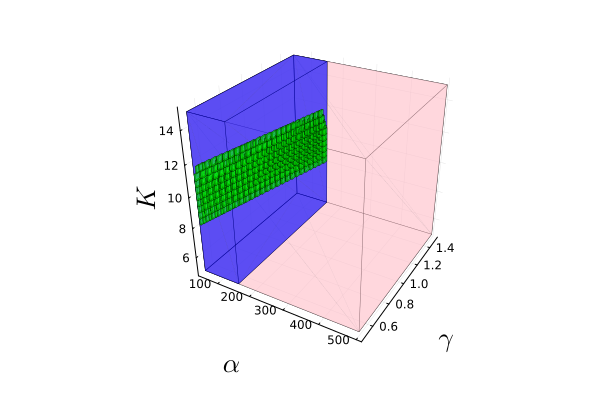

Solution may exist.


In [ ]:
begin
    
    f(x, y, α, γ, K) = IntervalBox(α - γ*x, α/(1 + x/K) - γ*y);
    
    # Desired steady state interval
    local Xd = Interval(95, 105);
    local Yd = Interval(8.5, 9.5); 


    # Initial parameter sets
    local A0 = Interval(50, 500);
    local Γ0 = Interval(.5, 1.5);
    local K0 = Interval(5, 15);

    
    # Initialize variables
    local B0, C0, D0, E0, F0;
    local Z1, Z2;
    local B1, C1, D1, E1, F1;
    local A1, Γ1;
    
    # Initial box
    local P0 = IntervalBox(A0, Γ0, K0);
    
    # Initialize plot
    local plt = plot(xlabel=L"\alpha", ylabel=L"\gamma", zlabel=L"K", tickfontsize=8, guidefontsize=18);
    plt = plot3D(P0..., "pink");

    # Specify tolerance
    local tol = 0.001;
    
    # Initialize solution variable
    local Solution = [];
    
    # Contractor
    
    # There are two places where both α and γ appear.
    # Separately contract and intersect
    local Γ01, Γ02 = Γ0, Γ0;
    local A01, A02 = A0, A0;
    local Γ11, Γ12, A11, A12;
    
    # Forward
    B0 = Xd / K0;
    C0 = 1 + B0;
    D0 = Γ01 * Xd;
    E0 = Γ02 * Yd;
    F0 = A02 / C0;
    Z1 = A01 - D0;
    Z2 = F0 - E0;
    
    # Constraint
    Z1 = Z1 ∩ (0..0);
    Z2 = Z2 ∩ (0..0);
    
    # Backward
    F1 = (Z2 + E0) ∩ F0;
    E1 = (F0 - Z2) ∩ E0;
    D1 = (A01 - Z1) ∩ D0;
    A11 = (D0 + Z1) ∩ A01; 
    C1 = (A02 / F1) ∩ C0;
    A12 = (C0 * F1) ∩ A02;
    Γ12 = (E1 / Yd) ∩ Γ02;
    Γ11 = (D1 / Xd) ∩ Γ01;
    B1 = (C1 - 1) ∩ B0;
    K1 = (Xd / B1) ∩ K0;

    A1 = A11 ∩ A12;
    Γ1 = Γ11 ∩ Γ12;
    
    # Box at first iteration
    local P1 = IntervalBox(A1, Γ1, K1);
    
    # Plot
    plt = plot3D(P1..., "blue");
    
    # Non-Existence Criteria
    
    if isempty(P1)
    
        println("Solution does not exist.");
    
    else
        
        println("Solution may exist.");
    
        # Parameter subdivided, m times in each direction
        local m = 25;
        local P1m = mince(P1, m);
        local A0m, Γ0m, K0m;
        local B0m, C0m, D0m, E0m, F0m;
        local Z1m, Z2m;
        local B1m, C1m, D1m, E1m, F1m;
        local A1m, Γ1m;

        local Pold, Pnew;

        local Pfilter = filter(Pf -> ([0, 0] ∈ f(Xd × Yd × Pf...)), P1m);

        for i in 1:length(Pfilter)

            Pold = Pfilter[i]; 

            while true

                A0m, Γ0m, K0m = Pold; 

                # Contractor

                # There are two places where both α and γ appear.
                # Separately contract and intersect
                local Γ01m, Γ02m = Γ0m, Γ0m;
                local A01m, A02m = A0m, A0m;
                local Γ11m, Γ12m, A11m, A12m;

                # Forward
                B0m = Xd / K0m;
                C0m = 1 + B0m;
                D0m = Γ01m * Xd;
                E0m = Γ02m * Yd;
                F0m = A02m / C0m;
                Z1m = A01m - D0m;
                Z2m = F0m - E0m;

                # Constraint
                Z1m = Z1m ∩ (0..0);
                Z2m = Z2m ∩ (0..0);

                # Backward
                F1m = (Z2m + E0m) ∩ F0m;
                E1m = (F0m - Z2m) ∩ E0m;
                D1m = (A01m - Z1m) ∩ D0m;
                A11m = (D0m + Z1m) ∩ A01m; 
                C1m = (A02m / F1m) ∩ C0m;
                A12m = (C0m * F1m) ∩ A02m;
                Γ12m = (E1m / Yd) ∩ Γ02m;
                Γ11m = (D1m / Xd) ∩ Γ01m;
                B1m = (C1m - 1) ∩ B0m;
                K1m = (Xd / B1m) ∩ K0m;

                A1m = A11m ∩ A12m;
                Γ1m = Γ11m ∩ Γ12m;

                Pnew = IntervalBox(A1m, Γ1m, K1m);


                # Break if parameter grid is not empty
                if isempty(Pnew)

                    break;

                end
                
                # Break if there is no change in P
                if Pold == Pnew

                    # Plot
                    plt = plot3D(Pnew..., "lime");

                    push!(Solution, Pnew); # save

                    break;

                end


                
                # Break if there is not much change in P
                if maximum(diam.(Pold) .- diam.(Pnew)) < tol

                    # Plot
                    plt = plot3D(Pnew..., "lime");

                    push!(Solution, Pnew); # save

                    break;

                end


                Pold = Pnew;

            end

        end

    end

    display(plt);
#    savefig(plt, "Ex4_CSF.pdf");
#    Solution
end

*A function to plot in 3D.*

In [7]:
function plot3D(A, B, C, clr::String)
    # A, B, C are the intervals in the three directions.
    
    #@show clr
    
    # These are the vertices of the cube
    xp = [A.lo, A.lo, A.lo, A.lo, A.hi, A.hi, A.hi, A.hi]
    yp = [B.lo, B.hi, B.lo, B.hi, B.lo, B.lo, B.hi, B.hi]
    zp = [C.lo, C.lo, C.hi, C.hi, C.hi, C.lo, C.lo, C.hi]
    
    # These are their connections?
    connections = [(1,2,3), (4,2,3), (4,7,8), (7,5,6), (2,4,7), (1,6,2), (2,7,6), (7,8,5), (4,8,5), (4,5,3), (1,6,3), (6,3,5)]

    # Edges
    xe = [A.lo, A.hi, A.hi, A.lo, A.lo, A.lo, A.lo, A.lo, A.lo, A.lo, A.hi, A.hi, A.hi, A.hi, A.hi, A.hi, A.lo]
    ye = [B.lo, B.lo, B.lo, B.lo, B.lo, B.hi, B.hi, B.lo, B.lo, B.hi, B.hi, B.lo, B.hi, B.hi, B.lo, B.hi, B.hi]
    ze = [C.lo, C.lo, C.hi, C.hi, C.lo, C.lo, C.hi, C.hi, C.lo, C.lo, C.lo, C.lo, C.lo, C.hi, C.hi, C.hi, C.hi]

    plot!(xe, ye, ze; lc=:black, lw=0.5, label=false)
    mesh3d!(xp, yp, zp; connections, proj_type=:persp, lc=:black, fc=clr, fa=0.4, lw=0, label=false);

end

plot3D (generic function with 1 method)